In [1]:
import numpy as np

import gym

import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
env = gym.make('Taxi-v3')

NUM_STATES = env.observation_space.n
NUM_ACTIONS = env.action_space.n

print('States: {}'.format(NUM_STATES))
print('Actions: {}'.format(NUM_ACTIONS))

States: 500
Actions: 6


In [52]:
lr = 0.95 # learning rate
gamma = 0.95 # параметр дисконтирования

NUM_EPISODES = 500 # число эпизодов для обучения
MAX_STEPS = 1000 # максимальное число шагов в эпизоде

In [53]:
pathLenList = [] # длины траекторий по эпизодам
totalRewardList = [] # суммарные награды по эпизодам

# Инициализация Q-функции (таблицы)
Q = np.random.rand(NUM_STATES, NUM_ACTIONS)

for i in range(NUM_EPISODES):
    
    s = env.reset()

    totalReward = 0
    step = 0

    while step < MAX_STEPS:
        step += 1
            
        # Выбор действия по текущей политике
        a = np.argmax(Q[s,:])
        
        # Сделать шаг
        s1, r, done, _ = env.step(a)
        
        # Новое (целевое) значение Q-функции
        if done:
            Q_target = r
        else:
            Q_target = r + gamma * np.max(Q[s1,:])
            
        # Обновление Q-функции
        Q[s,a] = (1-lr) * Q[s,a] + lr * Q_target
        
        totalReward += r
        s = s1
        
        # Если конец эпизода
        if done:
            break
            
    pathLenList.append(step)
    totalRewardList.append(totalReward)
    print('Episode {}: Total reward = {}'.format(i, totalReward))        

Episode 0: Total reward = -623
Episode 1: Total reward = -686
Episode 2: Total reward = -650
Episode 3: Total reward = -641
Episode 4: Total reward = -605
Episode 5: Total reward = -596
Episode 6: Total reward = -560
Episode 7: Total reward = -200
Episode 8: Total reward = -632
Episode 9: Total reward = -479
Episode 10: Total reward = -533
Episode 11: Total reward = -524
Episode 12: Total reward = -560
Episode 13: Total reward = -605
Episode 14: Total reward = -326
Episode 15: Total reward = -140
Episode 16: Total reward = -371
Episode 17: Total reward = -539
Episode 18: Total reward = -160
Episode 19: Total reward = -407
Episode 20: Total reward = -326
Episode 21: Total reward = -269
Episode 22: Total reward = -281
Episode 23: Total reward = -153
Episode 24: Total reward = -139
Episode 25: Total reward = -257
Episode 26: Total reward = -200
Episode 27: Total reward = -118
Episode 28: Total reward = -112
Episode 29: Total reward = -43
Episode 30: Total reward = -23
Episode 31: Total re

In [54]:
print(Q)

[[ 0.10439442  0.94786577  0.24094613  0.11525521  0.49372859  0.99422417]
 [-5.90193192 -5.32837246 -6.42576642 -5.77078102  5.20997639 -8.60793406]
 [-5.18476736 -4.23525338 -4.0038027  -3.88581968 10.9512375  -8.67776268]
 ...
 [-1.87211472  9.19525913 -2.06225385 -1.65800789 -8.9769328  -9.38485098]
 [-4.01348514 -4.52210406 -3.76751222 -4.01148645 -8.93388125 -8.66045734]
 [ 0.544223   -0.40953497 -0.14243173 18.         -8.67788637  0.15151842]]


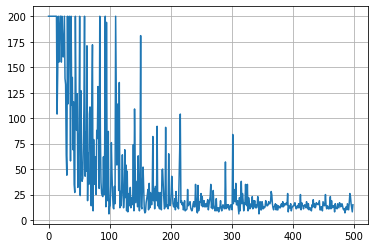

In [55]:
plt.plot(pathLenList)
plt.grid()

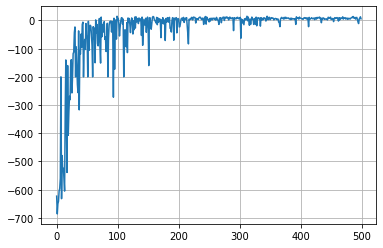

In [56]:
plt.plot(totalRewardList)
plt.grid()

# Симуляция

In [60]:
totalReward = 0
s = env.reset()

for _ in range(200):
    env.render()
    a = np.argmax(Q[s,:]) # выбираем оптимальное действие
    s, r, done, _ = env.step(a)
    totalReward += r
    if done:
        env.render()        
        break

env.close()
print('Total reward = {}'.format(totalReward))

+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+

+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (North)
+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (West)
+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (West)
+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (South)
+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (South)
+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (Pickup)
+---------+
|R: | : :G|
| : | : : |
| : : : : |
|_| : | : |
|Y| : |B: |
+---------+
  (North)
+---------+
|R: | : :G|
| : | : : |
|_: : : : |
| | : | : |
|Y| : |B: |
+---------+
  (North)
+---------+
|R: | : :G|
|_: | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (North)
+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: 